In [6]:
# import libraries
import gridded

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.collections
import matplotlib.patches
import matplotlib.colors
import numpy as np

import cmocean
import cmocean.plots
%matplotlib inline
#cmocean.plots.plot_lightness()

print('gridded', gridded.__version__)

gridded 0.1.0


In [8]:
# model output created by Andries
netcdf_file = r'D:\Projects\RO\AndriesPaarlberg_NetCDF_CF\tst19_map.nc'

In [11]:
# read the netcdf file using the package gridded
# which includes a single API for accessing / working with 
# gridded model results on multiple grid types
ds = gridded.Dataset(netcdf_file)

In [22]:
# now we retrieve four different info from the read nc-file
# - type of grid
# - number of nodes
# - number of faces
# - vertices per face
print(ds.grid.info)

UGrid object:
Number of nodes: 54925
Number of faces: 53597 with 4 vertices per face


In [ ]:
# the nc-file is a Unstructered Grid with 54925 number of nodes 
# and 53597 number of faces where each face has 4 vertices

In [23]:
# next, lets check the variables within the dataset"
print("variables available and their standard names:\n")
for name, var in ds.variables.items():
    try:
        print(name, ":", var.attributes['standard_name'])
    except KeyError:
        pass

variables available and their standard names:

mesh2d_node_z : altitude
mesh2d_taus : 
mesh2d_flowelem_bl : altitude
mesh2d_windy : northward_wind
mesh2d_ucy : northward_water_velocity
mesh2d_ucmag : sea_water_speed
mesh2d_s1 : sea_surface_height
mesh2d_ucyq : ucyq_velocity
mesh2d_windx : eastward_wind
mesh2d_s0 : sea_surface_height
mesh2d_ucx : eastward_sea_water_velocity
mesh2d_ucxq : ucxq_velocity
mesh2d_Numlimdt : 
mesh2d_czs : 
mesh2d_Patm : surface_air_pressure
mesh2d_flowelem_ba : cell_area
mesh2d_waterdepth : sea_floor_depth_below_sea_surface


In [41]:
# we are interested in the sea surface height:
ssh = ds.variables['mesh2d_s1']

In [45]:
ssh.attributes

{'_FillValue': -999.0,
 'cell_methods': 'nmesh2d_face: mean',
 'coordinates': 'mesh2d_face_x mesh2d_face_y',
 'grid_mapping': 'wgs84',
 'location': 'face',
 'long_name': 'Water level',
 'mesh': 'mesh2d',
 'standard_name': 'sea_surface_height',
 'units': 'm'}

In [42]:
def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

# the first and last step of this variable are at?
print("minimum time:", ssh.time.min_time)
print("manimum time:", ssh.time.max_time)
time_arr = ssh.time.get_time_array()
print("timestep (day, hours, minutes):", days_hours_minutes(time_arr[1] - time_arr[0]))

minimum time: 2017-11-01 00:00:00
manimum time: 2017-11-09 00:00:00
timestep (day, hours, minutes): (0, 6, 0)


In [62]:
# note that we are working with just the Variable object now...
lon = ssh.grid.node_lon
lat = ssh.grid.node_lat
faces = ssh.grid.faces

In [68]:
fig, ax = plt.subplots(1,1)
ax.plot(grid.x.transpose(), grid.y.transpose(), 'g')
ax.plot(grid.x, grid.y, 'g')
ax.set_aspect('equal')

array([ 7.15566678,  7.14498992,  7.13444633, ...,  7.33046334,
        7.33004956,  7.32963592])

In [65]:
patches = []
for face in faces[0:10]:
    polygon = Polygon(face, False)
    patches.append(polygon)

ValueError: 'vertices' must be a 2D list or array with shape Nx2

In [66]:
np.random.rand(num_sides ,2)

array([[ 0.22782376,  0.06551716],
       [ 0.38074205,  0.26996649],
       [ 0.11099613,  0.72977398],
       [ 0.10566709,  0.21747249],
       [ 0.5157513 ,  0.91803246]])

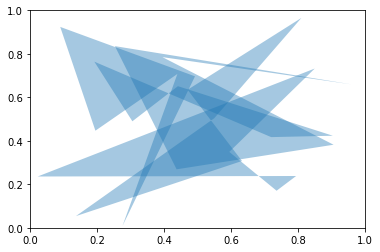

In [61]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()
patches = []
num_polygons = 5
num_sides = 5

for i in range(num_polygons):
    polygon = Polygon(np.random.rand(num_sides ,2), True)
    patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

# colors = 100*np.random.rand(len(patches))
# p.set_array(np.array(colors))

ax.add_collection(p)

plt.show()

In [ ]:
triang = tri.Triangulation(lon, lat, triangles=faces)